In [1]:
import pandas as pd
ecom_df = pd.read_excel('/home/cha/Desktop/Portfolio_Projects/Churn_Pred/data/E Commerce Dataset.xlsx', 'E Comm')
data_dict_df = pd.read_excel('/home/cha/Desktop/Portfolio_Projects/Churn_Pred/data/E Commerce Dataset.xlsx', 'Data Dict')

Feature -> Description

1. CustomerID -> Unique customer ID
2. Churn ->	Churn Flag
3. Tenure -> Tenure of customer in organization
4. PreferredLoginDevice -> Preferred login device of customer
5. CityTier -> City tier
6. WarehouseToHome -> Distance in between warehouse to home of customer
7. PreferredPaymentMode -> Preferred payment method of customer
8. Gender -> Gender of customer
9. HourSpendOnApp -> Number of hours spend on mobile application or website
10. NumberOfDeviceRegistered -> Total number of deceives is registered on particular customer
11. PreferedOrderCat -> Preferred order category of customer in last month
12. SatisfactionScore -> Satisfactory score of customer on service
13. MaritalStatus -> Marital status of customer
14. NumberOfAddress -> Total number of added added on particular customer
15. Complain -> Any complaint has been raised in last month
16. OrderAmountHikeFromlastYear -> Percentage increases in order from last year
17. CouponUsed -> Total number of coupon has been used in last month
18. OrderCount -> Total number of orders has been places in last month
19. DaySinceLastOrder -> Day Since last order by customer
20. CashbackAmount -> Average cashback in last month

Looking At:
- Missing/Null Values 
- Outliers
- Distributions
- Class Imbalance (Churn Rate)
- Correlation Heat Maps

In [2]:
ecom_df.info() # Shows Null Count of All Columns in the "Non-Null Count" Column
ecom_df.describe() # Shows Distributions of each column & Potential Outliers

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.221492
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.193869
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,146.000000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.000000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.000000
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,325.000000


<Axes: title={'center': 'Churn Rate'}, xlabel='Churn'>

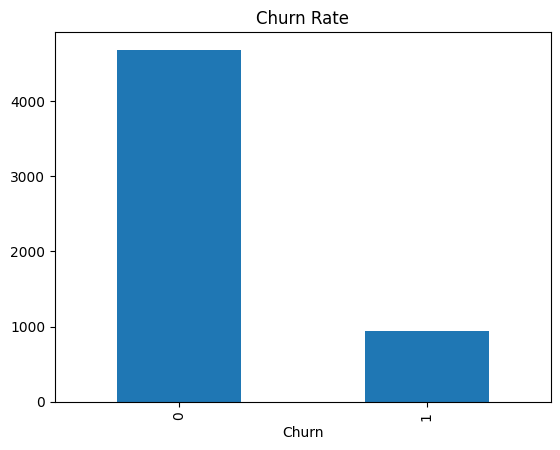

In [3]:
# Class Imbalance
ecom_df['Churn'].value_counts().plot(kind='bar', title='Churn Rate')

The Churn rate is 16.8%. This class imbalance suggests that oversampling or class weighting might be needed in the future.

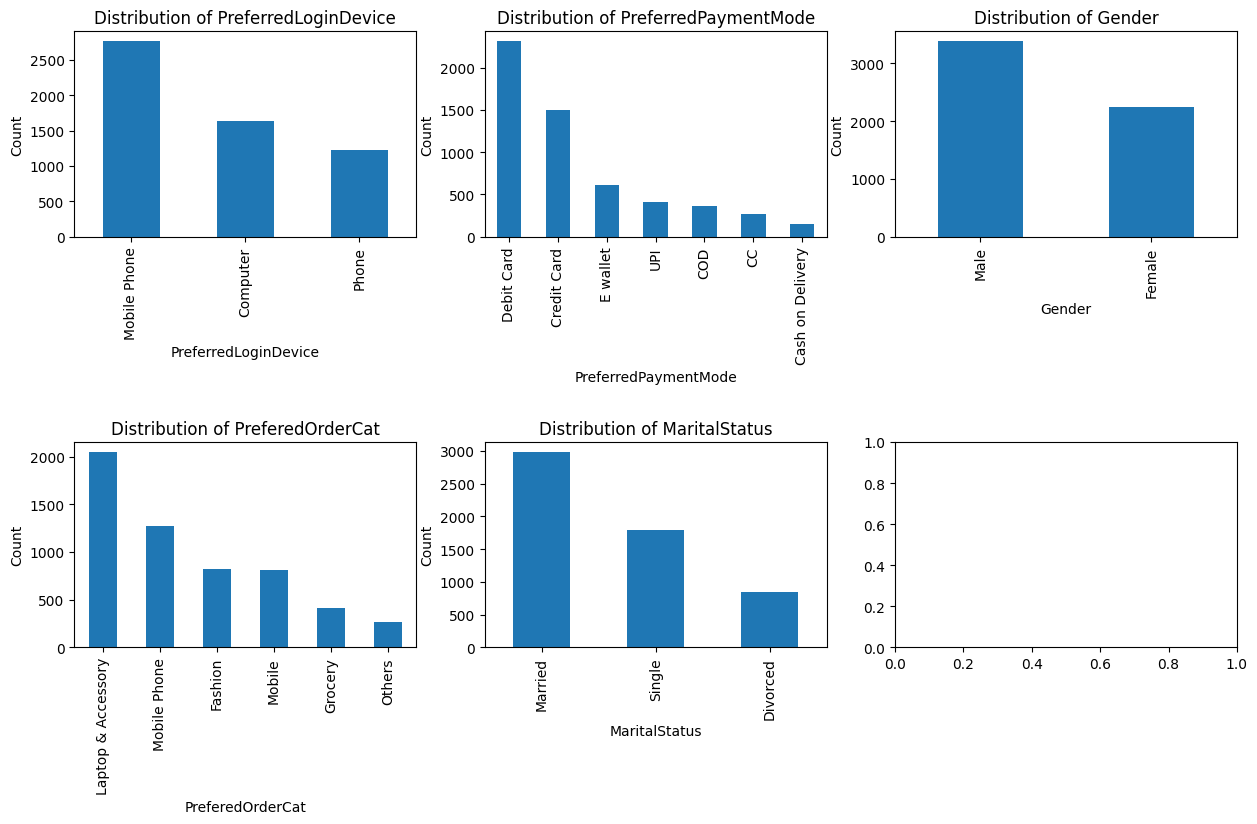

In [4]:
# Categorical Distributions
import matplotlib.pyplot as plt

cat_features = ['PreferredLoginDevice','PreferredPaymentMode','Gender','PreferedOrderCat','MaritalStatus']

ig, axes = plt.subplots(2, 3, figsize=(15, 8))  # 2 rows, 3 columns
plt.subplots_adjust(hspace=1)
axes = axes.flatten()

for i, col in enumerate(cat_features):
    ecom_df[col].value_counts().plot(kind='bar', ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")

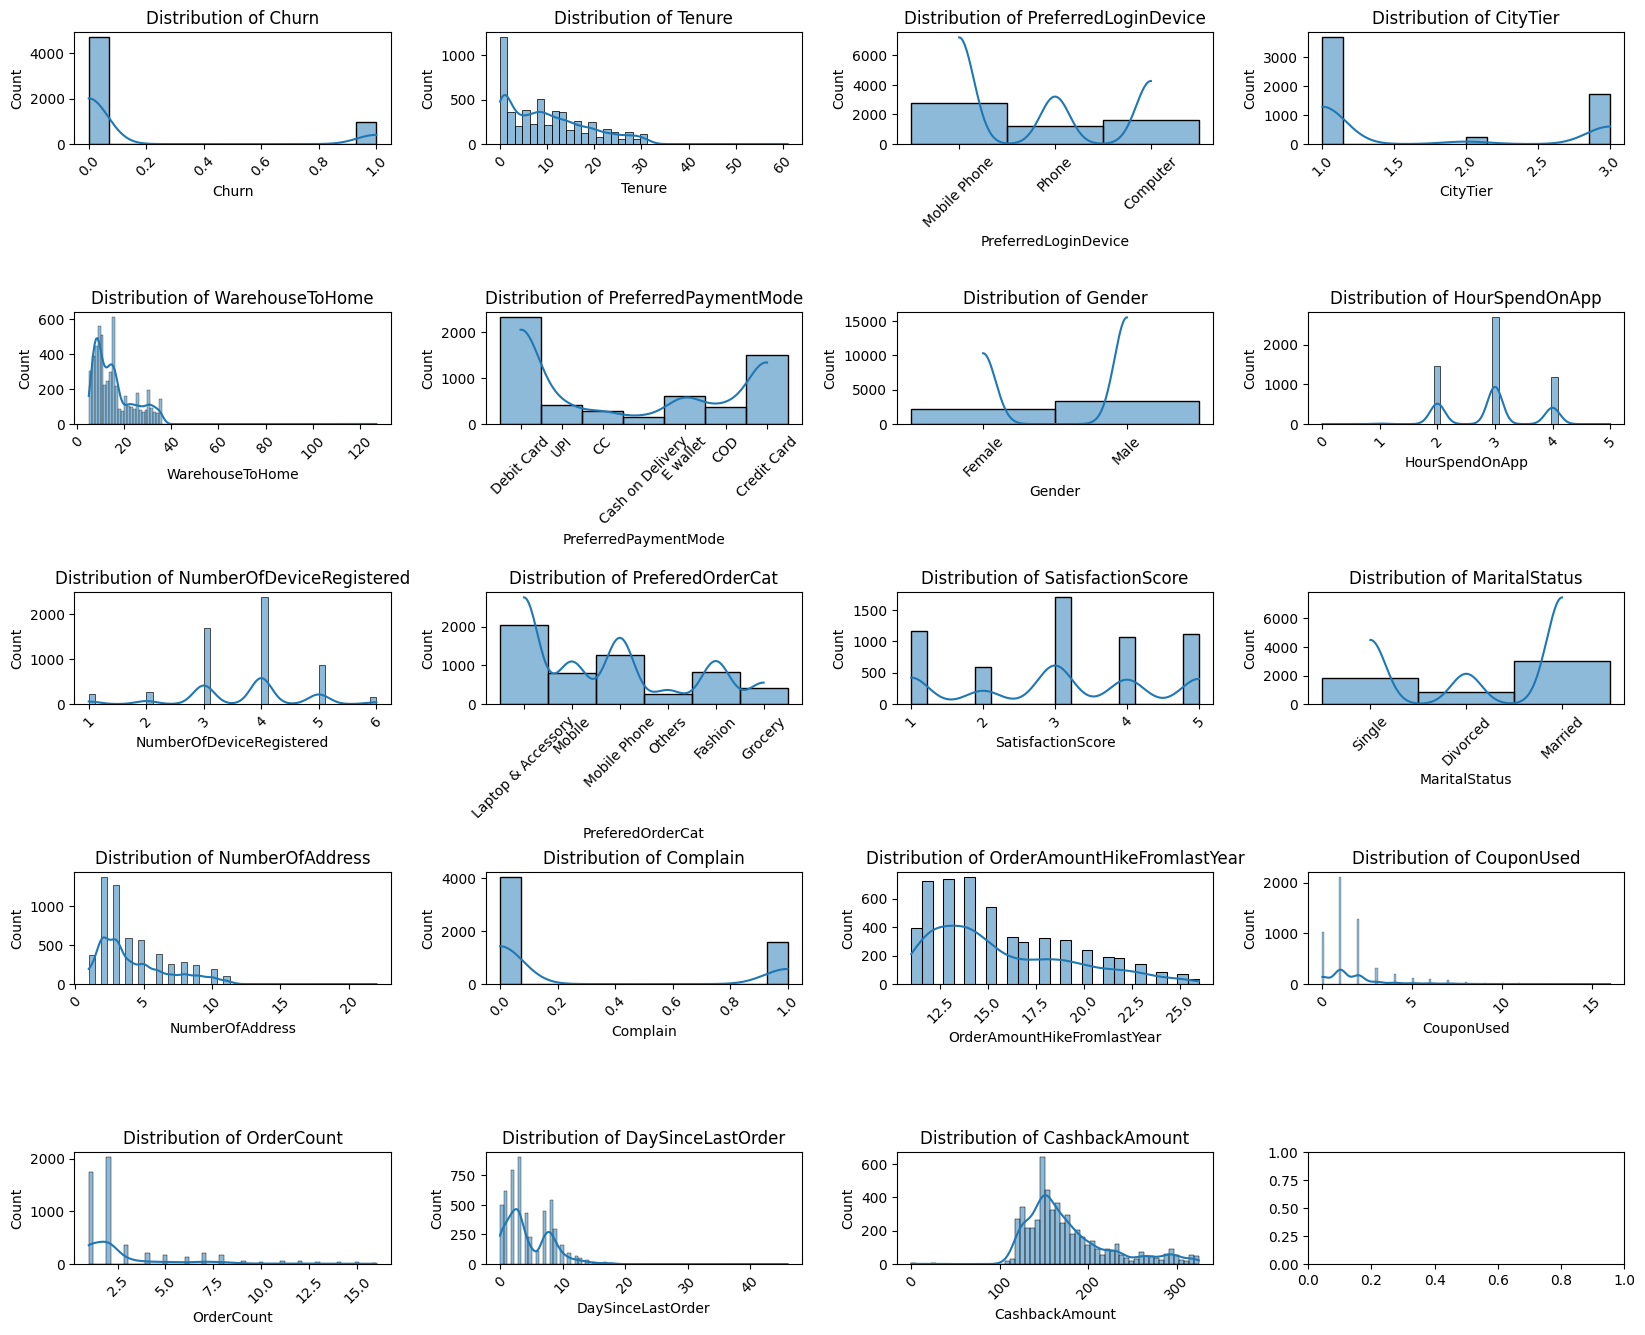

In [5]:
# Histograms
import seaborn as sns
fig, axes = plt.subplots(5,4 ,figsize=(20,16))
plt.subplots_adjust(hspace=1.5, wspace=0.3)
axes = axes.flatten()
for i,col in enumerate(ecom_df.columns[1:]): # Omitting "CustomerID"
    sns.histplot(ecom_df[col],kde=True,ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].tick_params(axis='x', rotation=45)
    

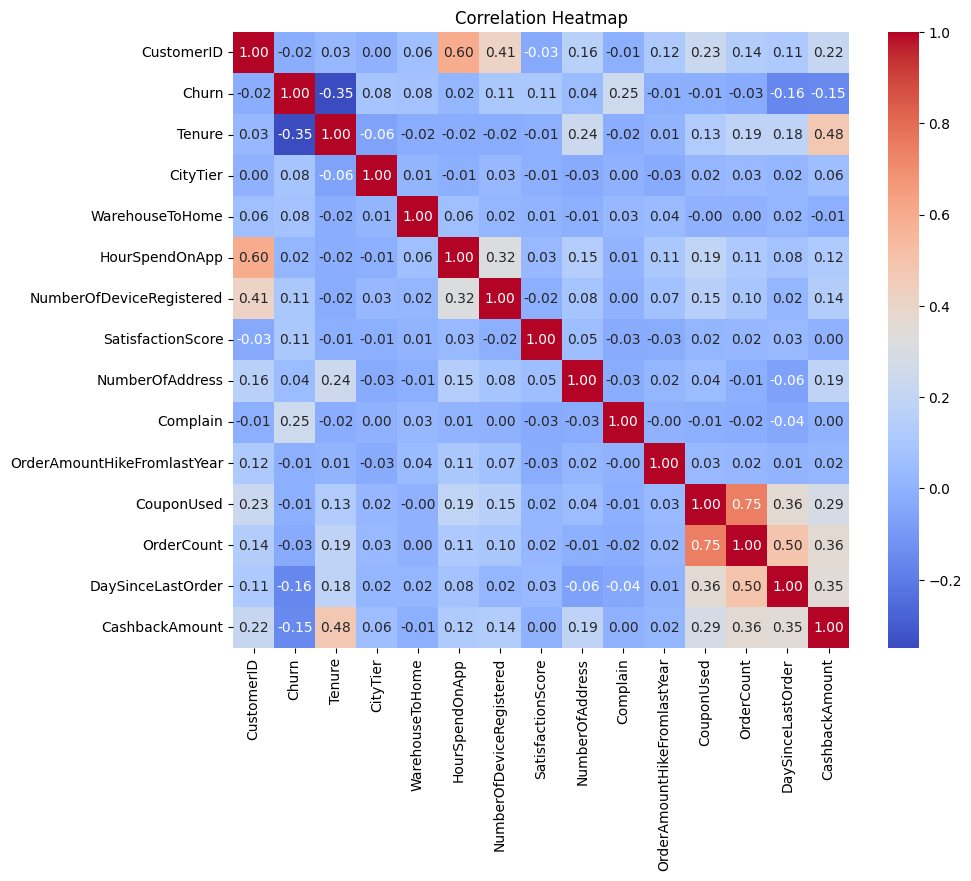

In [6]:
# Correlation Heatmaps
corr_matrix = ecom_df.corr(numeric_only=True)
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Heatmap')
plt.show()

Interesting Insights from Correlation Heatmap
1. OrderCount is strongly positvely correlated to CouponUsed (r = 0.75). This indicates that customers who use more coupons make more orders -- a sign of higher engagement and lower churn rate. 

2. DaysSinceLastOrder is positevly correlated to OrderCount (r = 0.5). This suggests that customers who have placed many orders in the last month are now taking longer to make purchases -- possibly indicating less engagement and an increase in churn.

3. CashbackAmount is positvely correlated to Tenure (r = 0.48). Customers who get more in cashback tend to stay with the platform longer, suggesting that customer rewards contribute to loyalty and decrease churn.

4. NumberOfRegisteredDevices is moderately correlated to HourSpendOnApp (r = 0.32). The more registered devices tends spend more time on the app, indicating higher platform engagement and increased likelihood of future purchases 